## 1.00 Problem Set 4
Ana Fiallo | March 10,2023

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Extract training data and train linear regression model

In [5]:
train_df = pd.read_csv("train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


/var/folders/8s/cmks6vfx4vxb_x2clcgwn8080000gn/T/ipykernel_135/667998391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(train_df.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

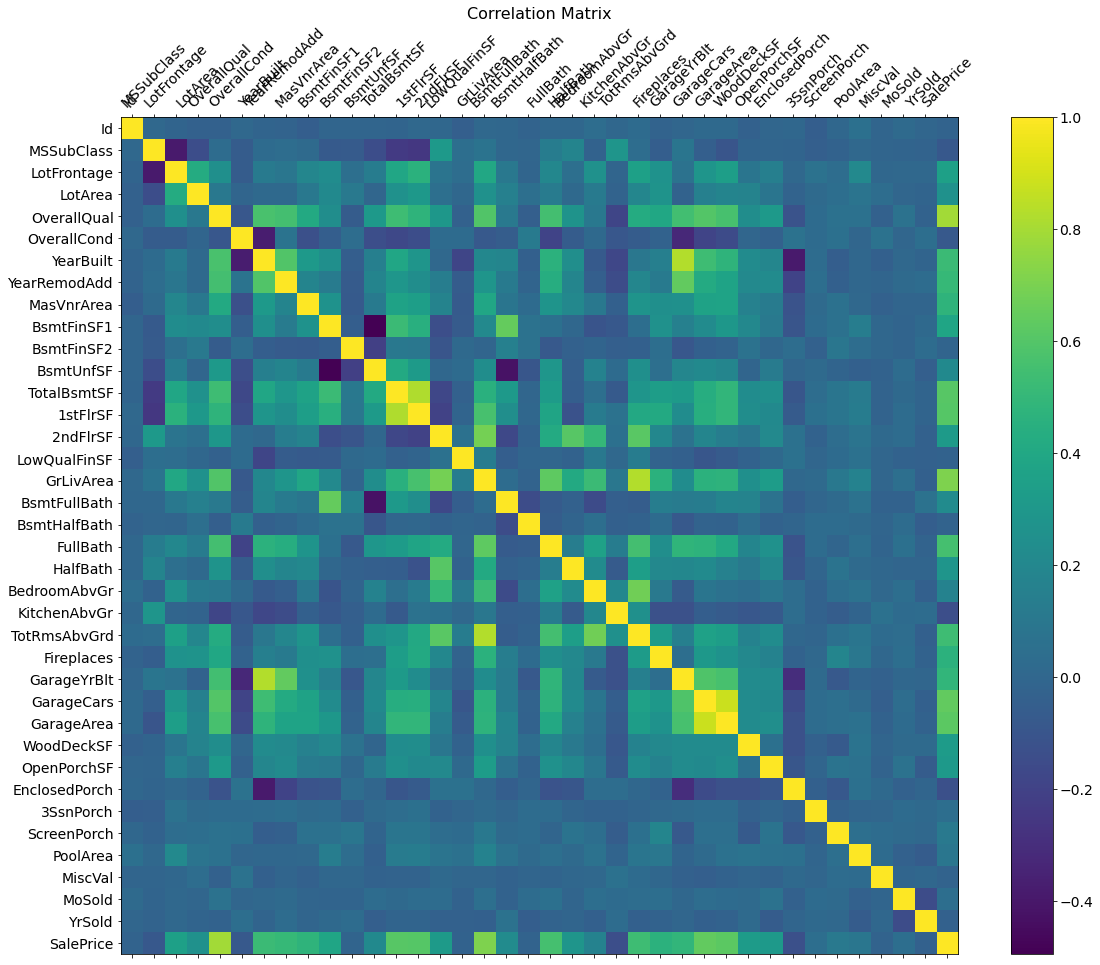

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train_df.corr(), fignum=f.number)
plt.xticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [23]:
# define features to include in model input & output
x_features = ['OverallQual', 'GrLivArea']
X = train_df[x_features].values

y_feature = ['SalePrice']
y = train_df[y_feature].values.reshape(-1, 1)

In [24]:
# build linear regression model
from sklearn import linear_model
model = linear_model.LinearRegression().fit(X,y)

In [19]:
# extract test data
test_df = pd.read_csv("test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [30]:
X_test = test_df[x_features].values
y_pred = model.predict(X_test)
y_pred

array([[ 47188.41394173],
       [ 98753.36566861],
       [246626.85346602],
       [154001.10709025],
       [209867.45021193],
       [115176.86008515],
       [185565.32333502],
       [ 88305.07081654],
       [221375.0687487 ],
       [145174.875397  ],
       [131153.45669444],
       [153107.31147574],
       [176906.6783195 ],
       [117243.7624437 ],
       [153444.54343872],
       [251710.31602352],
       [209867.45021193],
       [234672.33712201],
       [208079.85898292],
       [209979.17466375],
       [ 90539.5598528 ],
       [194002.57805446],
       [129868.62549859],
       [209867.45021193],
       [320588.44056637],
       [109423.05081677],
       [130762.4211131 ],
       [250648.9337313 ],
       [137018.99041464],
       [161041.80616202],
       [167854.93911508],
       [298018.04269256],
       [299472.51917367],
       [218246.78409792],
       [113445.13108205],
       [ 74507.1010176 ],
       [282045.56329835],
       [285115.92711567],
       [1023

In [38]:
predictions_df = test_df[['Id']]
predictions_df[y_feature] = y_pred
# plt.plot(y_pred)
predictions_df.columns = ["ID", "SALEPRICE"]
predictions_df.to_csv('predictions.csv')
predictions_df

/var/folders/8s/cmks6vfx4vxb_x2clcgwn8080000gn/T/ipykernel_135/2950344101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df[y_feature] = y_pred


,ID,SALEPRICE
0,1001,47188.413942
1,1002,98753.365669
2,1003,246626.853466
3,1004,154001.107090
4,1005,209867.450212
...,...,...
455,1456,185006.701076
456,1457,208804.009312
457,1458,256568.271070
458,1459,120372.047094
